## <b> [3단계] AI 모델링
---

## 1, 2 단계에서 진행하신 내용을 아래에 그대로 진행해주세요.

---

# <b>Step 0. 라이브러리 import 및 데이터 불러오기
### **가. 라이브러리 import**

* 데이터 프레임 관련 라이브러리

In [113]:
#라이브러리 불러오기
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier, plot_tree
import lightgbm as lgb
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import * 
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings    # 경고메시지 제외
warnings.filterwarnings(action='ignore')

### **나.  학습데이터 불러오기**

In [124]:
data = pd.read_csv('df3.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace=True)

### **다.  데이터 전처리**

In [125]:
target = 'Result_v1'
x = data.drop(target, axis = 1)
y = data.loc[:, target]

### **라. train_test_split을 이용하여 train/test  데이터 분리**



In [126]:
# train_test_split 사용
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.2, random_state = 2022)

### **마. Confusion Matrix 함수 정의**


#### Confusion Matrix란 Training 을 통한 Prediction 성능을 측정하기 위해 예측 value와 실제 value를 비교하기 위한 표입니다.
#### 아래 함수는 이번 과제에서 confusion matrix 결과를 보기 쉽게 표현한 것으로 사용 예를 참고하여 모델 결과 확인에 사용하시기 바랍니다.



**<span style="color:green">[참고링크] 공식 Document**</span>
 
* confusion matrix(https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html)

In [86]:
from sklearn.metrics import classification_report as creport
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score

In [87]:
def plot_confusion_matrix(ax, matrix, labels = ['malicious','benign'], title='Confusion matrix', fontsize=9):
    ax.set_xticks([x for x in range(len(labels))])
    ax.set_yticks([y for y in range(len(labels))])

    # Place labels on minor ticks
    ax.set_xticks([x + 0.5 for x in range(len(labels))], minor=True)
    ax.set_xticklabels(labels, rotation='90', fontsize=fontsize, minor=True)
    ax.set_yticks([y + 0.5 for y in range(len(labels))], minor=True)
    ax.set_yticklabels(labels[::-1], fontsize=fontsize, minor=True)

    # Hide major tick labels
    ax.tick_params(which='major', labelbottom='off', labelleft='off')

    # Finally, hide minor tick marks
    ax.tick_params(which='minor', width=0)

    # Plot heat map
    proportions = [1. * row / sum(row) for row in matrix]
    ax.pcolor(np.array(proportions[::-1]), cmap=plt.cm.Blues)

    # Plot counts as text
    for row in range(len(matrix)):
        for col in range(len(matrix[row])):
            confusion = matrix[::-1][row][col]
            if confusion != 0:
                ax.text(col + 0.5, row + 0.5, int(confusion),
                        fontsize=fontsize,
                        horizontalalignment='center',
                        verticalalignment='center')

    # Add finishing touches
    ax.grid(True, linestyle=':')
    ax.set_title(title, fontsize=fontsize)
    ax.set_xlabel('prediction', fontsize=fontsize)
    ax.set_ylabel('actual', fontsize=fontsize)

    plt.show()

### <span style="color:blue">[예시] Confusion Matrix 사용 방법<span>

- 샘플
#### > confusion = confusion_matrix(test_y, dt_pred)
#### > fig, ax = plt.subplots(figsize=(10,3))
#### > plot_confusion_matrix(ax, confusion, fontsize=30)


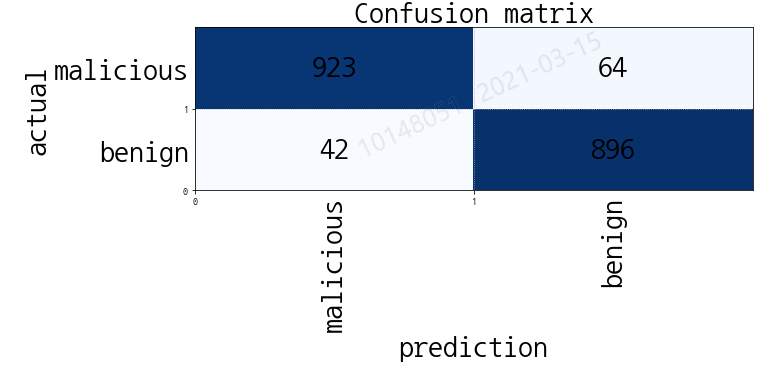

---

## <b> Q. AI 분류 모델 만들기

* 전처리한 데이터셋을 활용해 악성사이트 여부를 판별하는 AI 분류 모델을 <font color="red">최소 3개 이상 </font>만들어보세요.

## Logistic Regression

In [56]:
# 1. import
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import *

In [57]:
# 2.선언 
model = LogisticRegression()

In [58]:
# 3. fit(), 학습
model.fit(x_train, y_train)

LogisticRegression()

In [60]:
# 4. predict(), 예측
pred = model.predict(x_val)

In [61]:
# train 및 val 데이터 정확도 확인 
accuracy_score(y_val, pred)

0.7979981801637852

In [65]:
# Test 데이터 결과 Confusion Matrix 확인

confusion_matrix( y_val , pred)

array([[430, 104],
       [118, 447]], dtype=int64)

In [26]:
print(classification_report(y_val , pred))

              precision    recall  f1-score   support

         0.0       0.83      0.80      0.82       534
         1.0       0.82      0.85      0.83       565

    accuracy                           0.83      1099
   macro avg       0.83      0.82      0.82      1099
weighted avg       0.83      0.83      0.83      1099



In [1]:
# Feature(특징)별 가중치 확인
print(model.coef_)
print(model.intercept_)

NameError: name 'model' is not defined

## DecisionTree(전체)

In [28]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import *

In [31]:
model = DecisionTreeClassifier(max_depth=14, min_samples_leaf=200)
model.fit(x_train, y_train)
pred = model.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       534
         1.0       0.88      0.88      0.88       565

    accuracy                           0.88      1099
   macro avg       0.88      0.88      0.88      1099
weighted avg       0.88      0.88      0.88      1099



In [32]:
def plot_feature_importance(importance, names):
    feature_importance = np.array(importance)
    feature_names = np.array(names)

    data={'feature_names':feature_names,'feature_importance':feature_importance}
    fi_df = pd.DataFrame(data)

    fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)
    fi_df.reset_index(drop=True, inplace = True)

    plt.figure(figsize=(10,8))
    sns.barplot(x='feature_importance', y='feature_names', data = fi_df)

    plt.xlabel('FEATURE IMPORTANCE')
    plt.ylabel('FEATURE NAMES')
    plt.grid()

    return fi_df

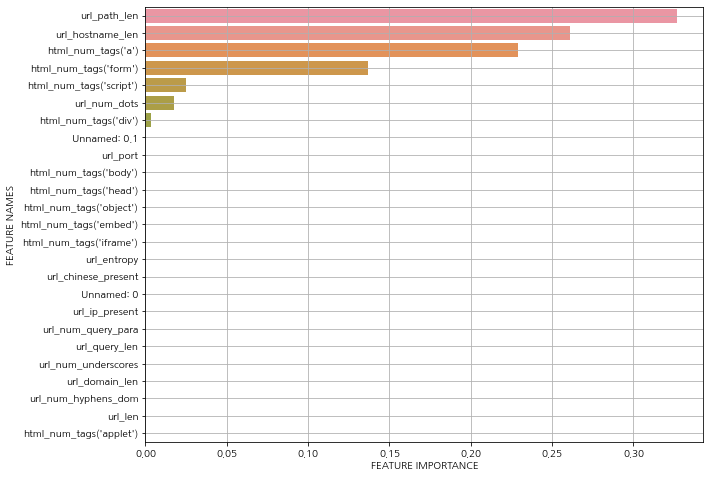

In [33]:
result = plot_feature_importance(model.feature_importances_, list(x_train))

In [90]:
data = pd.read_csv('df.csv')
data.drop(['Unnamed: 0'], axis = 1, inplace=True)
data

,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,url_ip_present,...,html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),html_num_tags('applet'),Result_v1
0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,0.0,...,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,0.0,...,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,0.0,1.0
2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,0.0,...,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,0.0,1.0
3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,0.0,...,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,0.0,1.0
4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,0.0,...,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0.0,0.0
3658,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,0.0,...,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,0.0,1.0
3659,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,0.0,...,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0.0,0.0
3660,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,0.0,1.0


In [106]:
target = 'Result_v1'
# ("html_num_tags('iframe')", 0.14613605783587189)
# ("html_num_tags('body')", 0.5152961915296258)
# ("html_num_tags('head')", 0.5443683868020825)
# ('url_entropy', 0.9155847611354128)
# ('url_len', 0.9326365799988009)
# ('url_num_query_para', 0.9977724929227856)
# ('url_query_len', 0.9995771617358498)
drop_features = ['Result_v1', 'url_query_len','url_num_query_para', 'url_len', 'url_entropy']
x = data.drop(drop_features, axis = 1)
y = data.loc[:, target]

In [13]:
data

,Unnamed: 0,url_len,url_num_hyphens_dom,url_path_len,url_domain_len,url_hostname_len,url_num_dots,url_num_underscores,url_query_len,url_num_query_para,...,html_num_tags('iframe'),html_num_tags('script'),html_num_tags('embed'),html_num_tags('object'),html_num_tags('div'),html_num_tags('head'),html_num_tags('body'),html_num_tags('form'),html_num_tags('a'),Result_v1
0,0,23.0,0.0,8.0,15.0,15.0,2.0,0.0,0.0,0.0,...,0.0,7.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0
1,1,75.0,0.0,58.0,17.0,17.0,6.0,0.0,0.0,0.0,...,0.0,18.0,0.0,0.0,20.0,1.0,1.0,0.0,21.0,1
2,2,20.0,0.0,4.0,16.0,16.0,2.0,0.0,0.0,0.0,...,1.0,33.0,0.0,0.0,101.0,1.0,1.0,3.0,70.0,1
3,3,27.0,0.0,13.0,14.0,14.0,3.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,151.0,1.0,1.0,1.0,55.0,1
4,4,39.0,2.0,12.0,27.0,27.0,2.0,0.0,0.0,0.0,...,0.0,10.0,0.0,0.0,332.0,1.0,1.0,0.0,321.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3657,3659,68.0,3.0,16.0,52.0,52.0,2.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,11.0,1.0,1.0,0.0,3.0,0
3658,3660,66.0,0.0,48.0,18.0,18.0,2.0,0.0,0.0,0.0,...,1.0,14.0,0.0,0.0,212.0,1.0,1.0,3.0,475.0,1
3659,3661,90.0,1.0,64.0,26.0,26.0,4.0,0.0,0.0,0.0,...,0.0,13.0,0.0,0.0,75.0,1.0,1.0,2.0,103.0,0
3660,3662,46.0,0.0,33.0,13.0,13.0,3.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,4.0,1.0,1.0,0.0,3.0,1


In [107]:
x_train, x_val, y_train, y_val = train_test_split(x,y,test_size = 0.3, random_state = 2022)

In [108]:
model = DecisionTreeClassifier(max_depth=14, min_samples_leaf=200)
model.fit(x_train, y_train)
pred = model.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

         0.0       0.87      0.87      0.87       534
         1.0       0.88      0.88      0.88       565

    accuracy                           0.88      1099
   macro avg       0.88      0.88      0.88      1099
weighted avg       0.88      0.88      0.88      1099



# RandomForest

In [137]:
params = {"n_estimators":range(5, 201, 5)}

In [138]:
rf_model = RandomForestClassifier()
rf_model_gs = GridSearchCV(m, params, cv = 5)
rf_model_gs.fit(x_train, y_train)
pred = rf_model_gs.predict(x_val)

In [139]:
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.96      0.97      0.96       350
           1       0.97      0.96      0.97       383

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733



# XGBOOST

In [127]:
params = {'max_depth':[3, 6, 9, 12], 'n_estimators':[50, 100, 150], 'learning_rate':[0.01, 0.1, 0.2, 0.3]}

In [128]:
xgb_model = XGBClassifier()
xgb_model_gs = GridSearchCV(xgb_model, params, cv = 5)
xgb_model_gs.fit(x_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     gamma=None, gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None, max_bin=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
    

In [129]:
pred = xgb_model_gs.predict(x_val)
print(classification_report(y_val, pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96       350
           1       0.97      0.96      0.96       383

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733



In [130]:
xgb_model_gs.best_score_

0.9610798984860418

# LightGBM

In [168]:
params = {'learning_rate' : [0.001, 0.1, 0.5, 1, 1.5, 2, 3], 
         'min_child_samples' : range(50,200,10),
         'num_leaves' : range(10,100,10),
         'n_estimators' : range(80,150,10)}

In [ ]:
lgb_model = lgb.LGBMClassifier()
lgb_model_gs = GridSearchCV(lgb_model, params, cv = 5)
lgb_model_gs.fit(x_train, y_train)
pred = lgb_model.predict(x_val)

In [ ]:
print(classification_report(y_val, pred))

In [166]:
print(lgb_model.get_params())

{'boosting_type': 'gbdt', 'class_weight': None, 'colsample_bytree': 1.0, 'importance_type': 'split', 'learning_rate': 0.1, 'max_depth': -1, 'min_child_samples': 20, 'min_child_weight': 0.001, 'min_split_gain': 0.0, 'n_estimators': 100, 'n_jobs': -1, 'num_leaves': 31, 'objective': None, 'random_state': None, 'reg_alpha': 0.0, 'reg_lambda': 0.0, 'silent': 'warn', 'subsample': 1.0, 'subsample_for_bin': 200000, 'subsample_freq': 0}


In [150]:
lgb_model1= lgb.LGBMClassifier(bagging_fraction=0.9, bagging_freq=4, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, feature_fraction=0.8,
               importance_type='split', learning_rate=0.5, max_depth=-1,
               min_child_samples=16, min_child_weight=0.001, min_split_gain=0.1,
               n_estimators=120, n_jobs=-1, num_leaves=80, objective=None,
               random_state=2022, reg_alpha=2, reg_lambda=5, silent='warn',
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)
lgb_model1.fit(x_train, y_train)
pred1 = lgb_model1.predict(x_val)
print(classification_report(y_val, pred1))

# Soft voting

In [156]:
voting_ensemble = VotingClassifier(estimators=[("rf", rf_model_gs), ("xgcv", xgb_model_gs), ("lgbm",  lgb_model)], \
                                   flatten_transform=True, n_jobs=-1, verbose=False, voting='soft', weights=None)

In [157]:
voting_ensemble.fit(x_train, y_train)
y_pred = voting_ensemble.predict(x_val)

In [158]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       350
           1       0.97      0.96      0.96       383

    accuracy                           0.96       733
   macro avg       0.96      0.96      0.96       733
weighted avg       0.96      0.96      0.96       733

